### Visualización de los datos

In [1]:
import pandas as pd

datos = pd.read_csv("./data/ingreso.csv")

datos

,ingreso,horas
0,9973.577534,40.905476
1,8961.047249,41.576483
2,7437.977263,41.369239
3,12064.915290,41.537211
4,9296.396167,40.441203
...,...,...
995,9998.522402,41.110352
996,6867.097603,40.617061
997,9757.539280,40.798085
998,11044.031510,41.443604


La hipótesis que tenemos es que el ingreso depende de las horas de trabajo

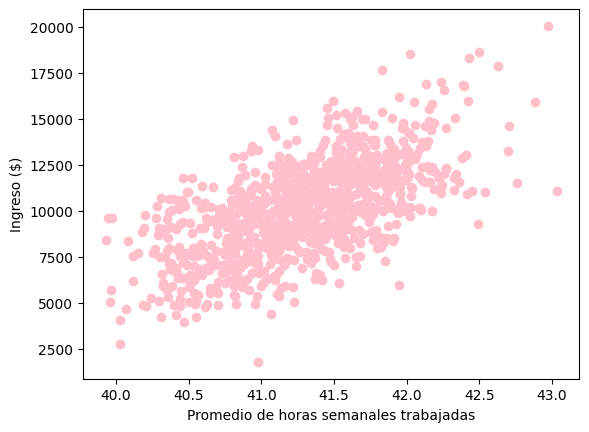

In [2]:
import matplotlib.pyplot as plt

plt.ylabel("Ingreso ($)");
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="pink")
plt.show()

In [3]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

# es necesario escribirlo así , ya que hay casos en que podemos predecir con más una variable de entrada
horas = datos["horas"].values.reshape(-1,1)

#Creamos el modelo -> obteniendo la pendiente y el punto de intesección
modelo = regresion.fit(horas, datos["ingreso"])

print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

Intersección (b) -112320.22713310868
Pendiente (m) [2965.35614382]


Podriamos decir que por cada hora trabajada se aumentan 3000 Unidades monetarias apróximadamente

In [4]:
#scikit nos proporciona un metodo para predecir de acuerdo a la entrada

entrada = [[39],[40],[43],[44]]
modelo.predict(entrada)

array([ 3328.6624759 ,  6294.01861972, 15190.08705118, 18155.443195  ])

Ahora se mostrará la predicción

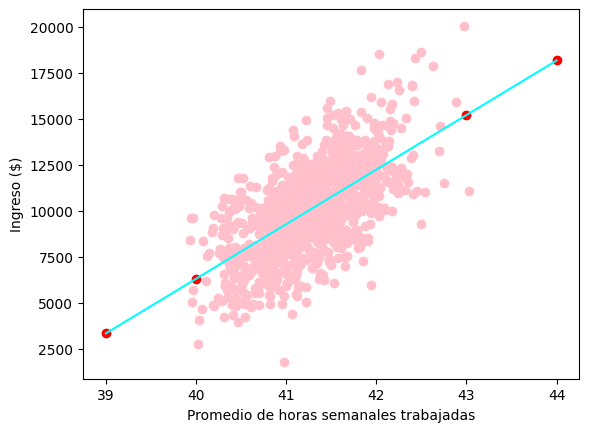

In [5]:
plt.scatter(entrada, modelo.predict(entrada), color="red")
plt.plot(entrada, modelo.predict(entrada), color="cyan")

plt.ylabel("Ingreso ($)");
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="pink")
plt.show()

Ahora debemos validar que tan bueno es nuestro modelo.
* Usaremos RMSE
* Coeficiente de determinación

In [6]:
from sklearn.metrics import mean_squared_error

y_real = datos["ingreso"]
y_predict = modelo.predict(datos["horas"].values.reshape(-1,1))

error = mean_squared_error(y_real, y_predict, squared=False)

print(f"Error de {error} unidades monerarias")

Error de 1941.889734617307 unidades monerarias


In [7]:
from sklearn.metrics import r2_score

error = r2_score(y_real,y_predict)

print(f"Porcentaje de aprobación: {error}")

Error: 0.39126726275722723


Como la aprobación es muy baja, significa que el modelo es pauperrimo. Ahora haremos una validación cruzada

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

print(modelo.score(datos["horas"].values.reshape(-1,1), y_real ))
scores = cross_val_score(modelo, datos["horas"].values.reshape(-1,1), y_real ,cv=5)

print(scores.mean())

0.39126726275722723
0.3880268738972698


Como se puede observar, aparentemente el modelo es bastante malo. ya que con una validación cruzada se evidenció lo malo que es.

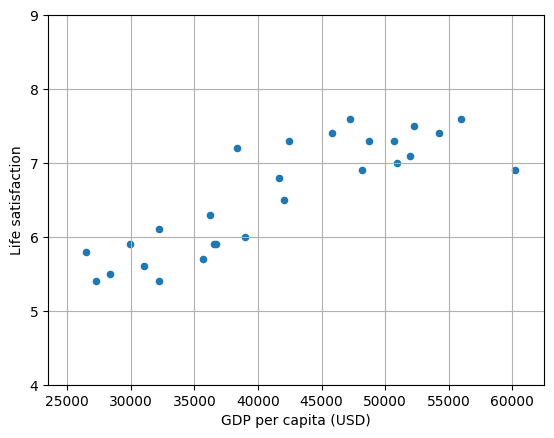

[[6.34814736]]


In [7]:
# Ejemplo de que tan felices son las personas teniendo dinero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Obtener la data
lifesat = pd.read_csv("./data/lifesat.csv")

# Variable independiente
X = lifesat[["GDP per capita (USD)"]].values

#Variable dependiente
y = lifesat[["Life satisfaction"]].values

# Visualización de la data
lifesat.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")

# Defininimos los alcances de la grilla
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Seleccionar el modelo lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X, y)
# Make a prediction for Cyprus
X_new = [[38_341]] # Cyprus' GDP per capita in 2020

# Creamos la predicción 
print(model.predict(X_new)) # output: [[6.30165767]]

In [21]:
# Ejemplo regresión lineal 2

# -> importación modulos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# -> Cargar data
data = pd.read_csv("./data/regresion/simpleRegresion/Salary_Data.csv")

# -> Separar en variable dependiente y independiente
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# -> dividir información en training, y test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [22]:
### Regresión lineal
from sklearn.linear_model import LinearRegression

regresion = LinearRegression()
regresion.fit(X_train, y_train)

# Predecir el conjunto de test
y_pred = regresion.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

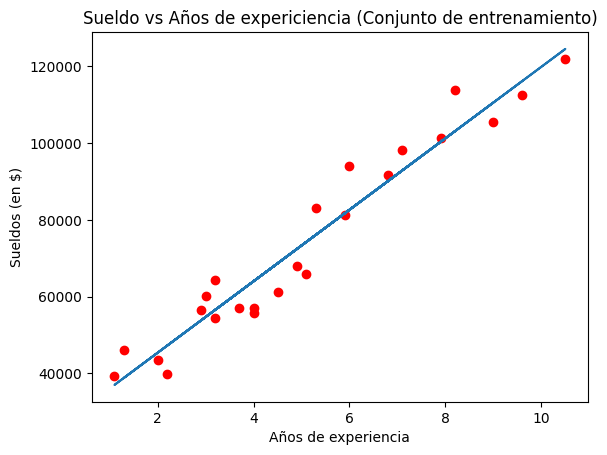

In [23]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regresion.predict(X_train))
plt.title("Sueldo vs Años de expericiencia (Conjunto de entrenamiento)")
plt.xlabel("Años de experiencia")
plt.ylabel("Sueldos (en $)")
plt.show()

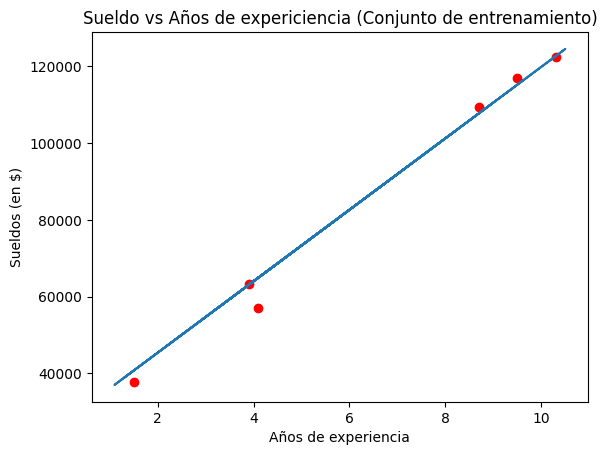

In [24]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regresion.predict(X_train))
plt.title("Sueldo vs Años de expericiencia (Conjunto de entrenamiento)")
plt.xlabel("Años de experiencia")
plt.ylabel("Sueldos (en $)")
plt.show()